In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras  import utils
from keras.utils import to_categorical
from sklearn.utils import class_weight, resample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [2]:
ecg_df=pd.read_csv(r"C:\Users\USER\Desktop\csvdataecgmitbih\MIT-BIH Arrhythmia Database.csv")

In [2]:
import sagemaker
from sagemaker import get_execution_role
import pandas as pd

sagemaker_session = sagemaker.Session()
role = get_execution_role()

s3_uri = 's3://bucketgrad3/MIT-BIH Arrhythmia Database.csv'

# Download the data to SageMaker instance
sagemaker_session.download_data(path='local/path', bucket='bucketgrad3', key_prefix='MIT-BIH Arrhythmia Database.csv')

ecg_df= pd.read_csv('local/path/MIT-BIH Arrhythmia Database.csv')



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [3]:
ecg_df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


              record       0_pre-RR      0_post-RR        0_pPeak  \
count  100689.000000  100689.000000  100689.000000  100689.000000   
mean      173.730984     279.400947     278.588207       0.049772   
std        51.673158      81.915453      81.124963       0.168789   
min       100.000000      11.000000       6.000000      -3.094391   
25%       115.000000     230.000000     230.000000      -0.054749   
50%       203.000000     267.000000     266.000000       0.015865   
75%       219.000000     324.000000     322.000000       0.125809   
max       234.000000    2114.000000    2114.000000       3.821118   

             0_tPeak        0_rPeak        0_sPeak        0_qPeak  \
count  100689.000000  100689.000000  100689.000000  100689.000000   
mean        0.372262       1.054485      -0.134376      -0.090466   
std         0.739879       0.617508       1.027590       0.189436   
min        -2.006422      -2.372835      -3.622550      -3.871359   
25%        -0.249060       0.7540

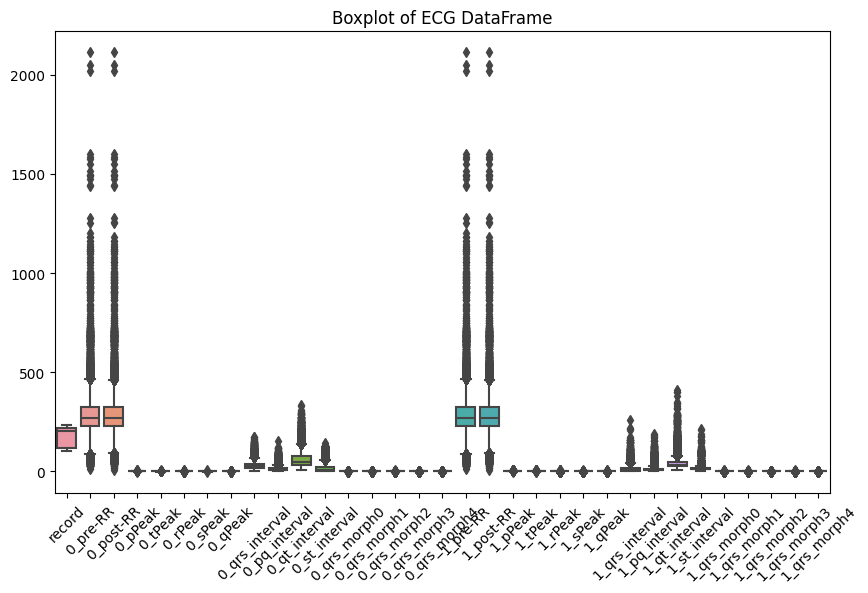

Number of  Rows with outliers:
record            46243
type              46243
0_pre-RR          46243
0_post-RR         46243
0_pPeak           46243
0_tPeak           46243
0_rPeak           46243
0_sPeak           46243
0_qPeak           46243
0_qrs_interval    46243
0_pq_interval     46243
0_qt_interval     46243
0_st_interval     46243
0_qrs_morph0      46243
0_qrs_morph1      46243
0_qrs_morph2      46243
0_qrs_morph3      46243
0_qrs_morph4      46243
1_pre-RR          46243
1_post-RR         46243
1_pPeak           46243
1_tPeak           46243
1_rPeak           46243
1_sPeak           46243
1_qPeak           46243
1_qrs_interval    46243
1_pq_interval     46243
1_qt_interval     46243
1_st_interval     46243
1_qrs_morph0      46243
1_qrs_morph1      46243
1_qrs_morph2      46243
1_qrs_morph3      46243
1_qrs_morph4      46243
dtype: int64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ecg_df' is your DataFrame

# Select numerical columns for summary statistics
numerical_cols = ecg_df.select_dtypes(include=['number']).columns
summary_stats = ecg_df[numerical_cols].describe()
print(summary_stats)

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=ecg_df[numerical_cols])
plt.title("Boxplot of ECG DataFrame")
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

# Identify and print rows with outliers using the IQR method
Q1 = ecg_df[numerical_cols].quantile(0.25)
Q3 = ecg_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((ecg_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (ecg_df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_rows = ecg_df[outliers]
print("Number of  Rows with outliers:")
print(outlier_rows.count())


In [5]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Define or load your DataFrame 'ecg_df'

# Check the data types of the columns
print(ecg_df.info())

# Select numerical columns
numerical_columns = ecg_df.select_dtypes(include=np.number).columns

# Ensure there are no missing values
ecg_df.dropna(subset=numerical_columns, inplace=True)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the selected columns
ecg_df[numerical_columns] = robust_scaler.fit_transform(ecg_df[numerical_columns])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [7]:
counter=0
for index, row in ecg_df.iterrows():
    for col in ecg_df.columns:
        if pd.isnull(row[col]):
            counter=counter+1
            print(f"Missing value in row {index}, column {col}")
if(counter==0):
    print("No missing values found")

No missing values found


In [8]:
mask = ecg_df['type'] =='Q'
ecg_df=ecg_df[~mask]

In [9]:
ecg_df['type'].value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Name: count, dtype: int64

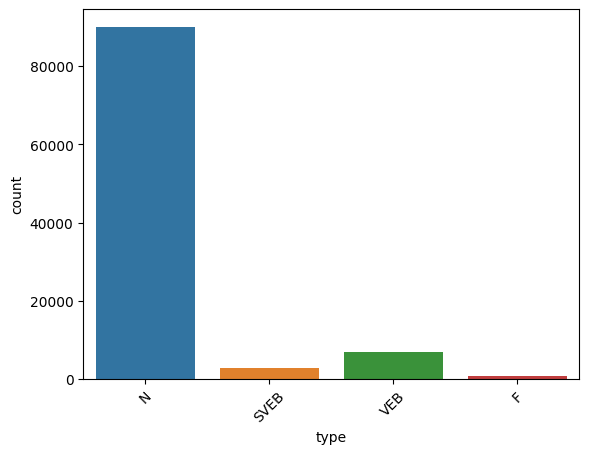

In [10]:
sns.countplot(x='type', data = ecg_df)
plt.xticks(rotation=45)
plt.show()

In [11]:
n_rows = ecg_df[ecg_df['type'] == 'N']

rows_to_keep = int(len(n_rows) * 0.20)

n_rows = n_rows.sample(n=rows_to_keep, random_state=42)

ecg_df = ecg_df[ecg_df['type'] != 'N']

ecg_df = pd.concat([ecg_df, n_rows])


In [12]:
ecg_df['type'].value_counts()

type
N       18016
VEB      7009
SVEB     2779
F         803
Name: count, dtype: int64

In [13]:
print(ecg_df.columns)

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [14]:
ecg_df= ecg_df.drop(columns=['record'])

In [15]:
print(ecg_df.columns)

Index(['type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak',
       '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
lb= LabelEncoder()
y=lb.fit_transform(y)
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
if len(selected_indices) > 0:
    selected_features = X.columns[selected_indices]
    print(selected_features)

Index(['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval',
       '1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1'],
      dtype='object')


In [17]:
selected=['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval','1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1','type']
ecg_df=ecg_df.loc[:, selected]

In [18]:
ecg_df

,0_pre-RR,0_pPeak,0_rPeak,0_sPeak,0_qt_interval,1_pre-RR,1_qPeak,1_qt_interval,1_qrs_morph0,1_qrs_morph1,type
420,-0.776596,-0.441555,0.266343,0.119755,-0.357143,-0.776596,0.228382,-1.15,0.228382,0.226947,SVEB
644,0.702128,0.110813,0.284297,0.070290,-0.261905,0.702128,0.270895,-0.30,0.270895,0.270943,SVEB
1537,-0.319149,-0.117868,0.373583,0.117490,-0.285714,-0.319149,0.212115,0.55,0.212115,0.212151,SVEB
1966,-0.712766,-2.296417,-0.064934,-0.547229,1.595238,-0.712766,0.183384,0.75,0.183384,0.204919,VEB
1967,-0.946809,4.175346,-0.242240,-0.526348,3.238095,-0.946809,-0.717862,-0.30,-0.717862,-0.677092,VEB
...,...,...,...,...,...,...,...,...,...,...,...
13067,1.329787,-0.395716,0.874214,1.346699,-0.238095,1.329787,-0.417100,-0.60,-0.417100,-0.393824,N
13250,0.478723,-0.114855,0.578480,1.225794,-0.190476,0.478723,-0.221401,-0.70,-0.221401,-0.205617,N
71857,-0.478723,-0.159711,-0.235514,-0.009617,2.309524,-0.478723,-0.061466,-0.20,-0.061466,-0.108109,N
62652,1.755319,-0.579410,-0.730680,-0.094958,0.047619,1.755319,0.075497,0.10,0.075497,0.204329,N


In [19]:
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
lb=LabelEncoder()
y=lb.fit_transform(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [31]:
pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 12.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
smote = SMOTE()
x_train2, y_train2 = smote.fit_resample(x_train, y_train)
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())
print("After SMOTE:")
print(pd.Series(y_train2).value_counts())

Before SMOTE:
1    11541
3     4492
2     1758
0      517
Name: count, dtype: int64
After SMOTE:
0    11541
2    11541
1    11541
3    11541
Name: count, dtype: int64


In [23]:
x_train2

,0_pre-RR,0_pPeak,0_rPeak,0_sPeak,0_qt_interval,1_pre-RR,1_qPeak,1_qt_interval,1_qrs_morph0,1_qrs_morph1
0,-0.712766,1.228926,0.029430,1.001325,0.023810,-0.712766,-0.864242,0.300000,-0.864242,-0.823848
1,-1.063830,0.418602,0.114163,1.035966,-0.642857,-1.063830,0.122571,-0.350000,0.122571,0.125187
2,-0.085106,0.159760,-0.820034,0.654037,-0.190476,-0.085106,0.219327,-0.100000,0.219327,0.242506
3,0.063830,-0.743316,0.503729,-0.140574,-0.095238,0.063830,0.184785,-0.150000,0.184785,0.294787
4,0.680851,-0.177981,-1.026374,0.188623,-0.380952,0.680851,-0.719766,-0.550000,-0.719766,-0.684903
...,...,...,...,...,...,...,...,...,...,...
46159,-0.675943,0.687799,0.353130,-0.139493,2.619048,-0.675943,-0.704375,10.953715,-0.704375,-0.469619
46160,-1.519445,-2.350900,-3.432646,-0.581504,0.138758,-1.519445,-0.219204,1.855130,-0.219204,-0.097364
46161,-0.749399,-0.175509,1.414589,-0.933810,1.355350,-0.749399,-1.836825,0.674059,-1.836825,-2.056816
46162,-0.517586,0.192621,-1.836075,0.109838,-0.495338,-0.517586,-1.053279,2.551759,-1.053279,-1.193221


In [24]:
y_train2

array([0, 2, 2, ..., 3, 3, 3])

In [25]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU

In [20]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [26]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.2))

gru_units = 128 
model.add(GRU(gru_units))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=4, activation='softmax'))


In [27]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Use the EarlyStopping callback in the fit method
history = model.fit(x_train2, y_train2, validation_data=(x_val, y_val), epochs=100, callbacks=[early_stopping])


Epoch 1/100
1443/1443 [==============================] - 30s 19ms/step - loss: 0.3844 - accuracy: 0.8663 - val_loss: 0.2672 - val_accuracy: 0.9021
Epoch 2/100
1443/1443 [==============================] - 30s 21ms/step - loss: 0.2023 - accuracy: 0.9329 - val_loss: 0.2488 - val_accuracy: 0.9159
Epoch 3/100
1443/1443 [==============================] - 31s 21ms/step - loss: 0.1626 - accuracy: 0.9463 - val_loss: 0.1999 - val_accuracy: 0.9349
Epoch 4/100
1443/1443 [==============================] - 31s 22ms/step - loss: 0.1403 - accuracy: 0.9538 - val_loss: 0.2040 - val_accuracy: 0.9240
Epoch 5/100
1443/1443 [==============================] - 30s 21ms/step - loss: 0.1222 - accuracy: 0.9600 - val_loss: 0.2337 - val_accuracy: 0.9270
Epoch 6/100
1443/1443 [==============================] - 30s 21ms/step - loss: 0.1108 - accuracy: 0.9632 - val_loss: 0.2178 - val_accuracy: 0.9338
Epoch 7/100
1443/1443 [==============================] - 30s 21ms/step - loss: 0.1012 - accuracy: 0.9664 - val_loss: 0

In [29]:
model.save('ecg_classifier4.keras')

In [30]:
from tensorflow import keras
model = keras.models.load_model('ecg_classifier4.keras')

In [31]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Metrics:", results[1:])

179/179 [==============================] - 2s 5ms/step - loss: 0.1911 - accuracy: 0.9378
Test Loss: 0.1910569816827774
Test Metrics: [0.9377840161323547]


Text(0.5, 0, 'epoch')

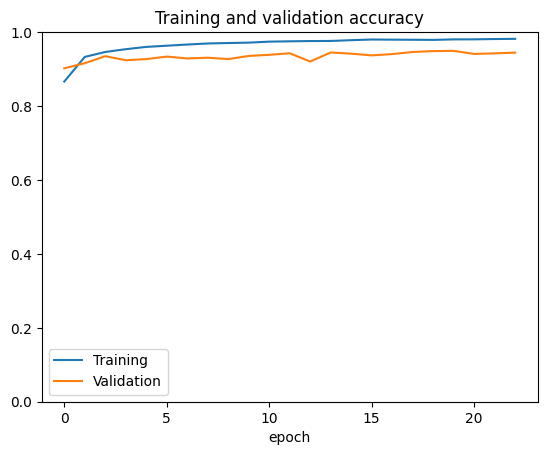

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0,1)
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

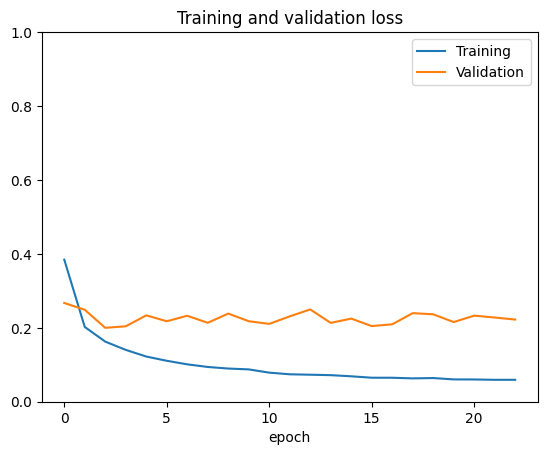

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.legend(['Training', 'Validation'])
plt.title("Training and validation loss")
plt.xlabel('epoch')

In [34]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_val is your true labels and y_pred_classes is your predicted labels
y_pred = model.predict(x_val)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred_classes, average='weighted')

# Print recall and f1 score
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Precision: {precision:.4f}')


144/144 [==============================] - 1s 4ms/step
Recall: 0.9349
F1 Score: 0.9369
Precision: 0.9413
